In [ ]:
import pandas as pd
import os

# Gasolina x ICMS

In [8]:

# !touch files.txt !cria arquivo em branco 
# !ls !lista arquivos dentro do diretório atual

# !ls > files.txt # manda resultado do ls pra dentro de files.txt 

!find *.csv > files.txt

In [63]:
files = pd.read_csv('files.txt',header=None)
files.columns = ['files']
files 

,files
0,2021-01-gasolina-etanol.csv
1,2021-02-gasolina-etanol.csv
2,2021-03-gasolina-etanol.csv
3,2021-04-gasolina-etanol.csv
4,2021-05-gasolina-etanol.csv
5,2021-06-gasolina-etanol.csv
6,2021-07-gasolina-etanol.csv
7,2021-08-gasolina-etanol.csv


In [64]:
dfs = []

for index, row in files.iterrows():
    df = pd.read_csv(row['files'],sep=';')
    dfs.append(df)

In [65]:
D = pd.concat(dfs)

In [66]:
D['Valor de Venda'] = D['Valor de Venda'].apply(lambda x: float(x.replace(',','.')))

D['Data da Coleta'] = pd.to_datetime(D['Data da Coleta'])

In [67]:
D[(D['Data da Coleta']=='2021-07-01') & (D['Valor de Venda']<4) & (D['Estado - Sigla']=='MA')]

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
719,NE,MA,SAO LUIS,PORTOS EMPREENDIMENTOS LTDA,73.787.483/0002-70,AVENIDA CAMBOA I,212,A,CAMBOA,65020-260,ETANOL,2021-07-01,3.899,NaN,R$ / litro,RAIZEN
723,NE,MA,SAO LUIS,J R FERREIRA EIRELI,07.233.294/0001-40,AVENIDA DANIEL DE LA TOUCHE,2004,ILHA DE BOMBA,COHAMA,65074-115,ETANOL,2021-07-01,3.899,NaN,R$ / litro,IPIRANGA
728,NE,MA,SAO LUIS,F. M. M. CORREIA DERIVADOS DE PETROLEO EIRELI,06.038.697/0001-76,AVENIDA JERONIMO DE ALBUQUERQUE,2000,LOJA 1,COHAFUMA,65070-210,ETANOL,2021-07-01,3.668,NaN,R$ / litro,BRANCA
730,NE,MA,SAO LUIS,AUTO POSTO BARBOZA LTDA,05.697.124/0001-91,RUA V,1,QUADRA 22,PLANALTO ANIL III,65066-290,ETANOL,2021-07-01,3.999,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
734,NE,MA,SAO LUIS,COIMBRA & SANTIAGO LTDA,02.738.944/0001-96,AVENIDA DOS PORTUGUESES,5,NaN,VILA BACANGA,65099-110,ETANOL,2021-07-01,3.899,NaN,R$ / litro,BRANCA
741,NE,MA,SAO LUIS,C. G. DE SOUSA EIRELI,69.425.734/0002-08,AVENIDA GUAJAJARA,205,NaN,SAO CRISTOVAO,65099-110,ETANOL,2021-07-01,3.899,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
744,NE,MA,SAO LUIS,A N DE MELO,07.068.075/0001-53,AVENIDA DANIEL DE LA TOUCHE,102,NaN,COHAMA,65074-115,ETANOL,2021-07-01,3.790,NaN,R$ / litro,BRANCA
746,NE,MA,SAO LUIS,COMERCIAL PETROMAR LTDA,06.302.616/0001-01,AVENIDA PRESIDENTE KENNEDY,SN,NaN,CENTRO,65025-001,ETANOL,2021-07-01,3.788,NaN,R$ / litro,IPIRANGA
748,NE,MA,SAO LUIS,REVENDEDORA DE PETROLEO SAO MARCOS LTDA,03.205.789/0001-05,AVENIDA DOS HOLANDESES,201,NaN,SAO MARCOS,65099-110,ETANOL,2021-07-01,3.859,NaN,R$ / litro,BRANCA
751,NE,MA,SAO LUIS,POSTO NATUREZA E SERVICOS LTDA,02.915.091/0001-10,AVENIDA SAO LUIS REI DE FRANCA,190,NaN,TURU,65065-470,ETANOL,2021-07-01,3.799,NaN,R$ / litro,SABBÁ


In [33]:
icms = pd.read_csv('icms.csv',sep=' ')
icms = icms.loc[:,['uf','icms']]

icms['icms'] = icms['icms'].apply(lambda x: float(x.replace('%','').replace(',','.')))

icms


,uf,icms
0,AC,25.0
1,AL,29.0
2,AM,25.0
3,AP,25.0
4,BA,28.0
5,CE,29.0
6,DF,28.0
7,ES,27.0
8,GO,30.0
9,MA,30.5


In [53]:
ma = D[D['Estado - Sigla']=='MA'].reset_index(drop=True)

# ma.dtypes
ma = ma.loc[:,['Data da Coleta','Valor de Venda']]

ma['Valor de Venda'] = ma['Valor de Venda'].apply(lambda x: float(x.replace(',','.')))

ma['Data da Coleta'] = pd.to_datetime(ma['Data da Coleta'])

ma

,Data da Coleta,Valor de Venda
0,2021-07-01,4.589
1,2021-07-01,4.950
2,2021-07-01,4.190
3,2021-07-01,4.599
4,2021-07-01,4.599
...,...,...
4704,2021-08-31,5.090
4705,2021-08-31,6.199
4706,2021-08-31,5.890
4707,2021-08-31,5.100


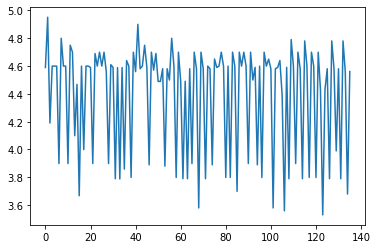

In [55]:
import seaborn as sns 
import matplotlib.pyplot as plt 


plt.plot(ma[ma['Data da Coleta']=='2021-07-01']['Valor de Venda'])



In [59]:
# ma[
#     (ma['Data da Coleta']=='2021-07-01') & (ma['Valor de Venda']<4)
#     ]


D[(D['Data da Coleta']=='01/07/2021') & (D['Valor de Venda']<4) & (D['Estado - Sigla']=='MA')]

TypeError: '<' not supported between instances of 'str' and 'int'

In [1]:


dfs = []

for mes in [6,7]:
    url = f'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-0{mes}-gasolina-etanol.csv'
    df = pd.read_csv(url,sep=';')
    dfs.append(df)

In [2]:
D = pd.concat(dfs)
# ma = df[df['Estado - Sigla']=='MA'].reset_index()

In [3]:
D

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47844,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
47845,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,26/07/2021,"4,99",NaN,R$ / litro,BRANCA
47846,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,26/07/2021,"5,87",NaN,R$ / litro,BRANCA
47847,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,AVENIDA SENADOR MONTANDON,950,NaN,CENTRO,38183-214,ETANOL,28/07/2021,"4,599",NaN,R$ / litro,RIO BRANCO


In [47]:
ma['Valor de Venda'] = ma.apply(lambda x: float(x['Valor de Venda'].replace(',','.')),axis=1)


In [49]:
ma.columns

Index(['index', 'Região - Sigla', 'Estado - Sigla', 'Município', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Número Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira'],
      dtype='object')

<AxesSubplot:xlabel='Município', ylabel='Valor de Venda'>

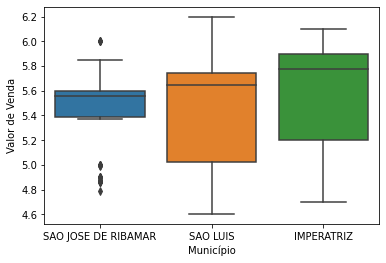

In [54]:
import seaborn as sns

# ma['Valor de Venda'].plot()

# sns.barplot(x='Município',y='Valor de Venda',data=ma)
sns.boxplot(x='Município',y='Valor de Venda',data=ma)


In [58]:
ma['Data da Coleta']

0      01/07/2021
1      01/07/2021
2      01/07/2021
3      01/07/2021
4      01/07/2021
          ...    
523    28/07/2021
524    28/07/2021
525    28/07/2021
526    28/07/2021
527    28/07/2021
Name: Data da Coleta, Length: 528, dtype: object

<AxesSubplot:xlabel='Município', ylabel='Valor de Venda'>

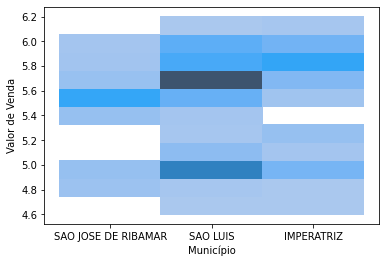

In [57]:
sns.histplot(x='Município',y='Valor de Venda',data=ma)

In [18]:
df = pd.read_csv('2021-07-gasolina-etanol.csv',sep=';')
ma = df[df['Estado - Sigla']=='MA'].reset_index()

ma

,index,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,254,NE,MA,SAO JOSE DE RIBAMAR,POSTO ATLANTICO SUL LTDA,04.034.035/0001-00,RODOVIA MA 203,20,K M,ARACAGY,65110-000,GASOLINA,01/07/2021,"5,399",NaN,R$ / litro,BRANCA
1,255,NE,MA,SAO JOSE DE RIBAMAR,POSTO ATLANTICO SUL LTDA,04.034.035/0001-00,RODOVIA MA 203,20,K M,ARACAGY,65110-000,ETANOL,01/07/2021,"4,879",NaN,R$ / litro,BRANCA
2,256,NE,MA,SAO JOSE DE RIBAMAR,POSTO ATLANTICO SUL LTDA,04.034.035/0001-00,RODOVIA MA 203,20,K M,ARACAGY,65110-000,GASOLINA ADITIVADA,01/07/2021,"5,459",NaN,R$ / litro,BRANCA
3,828,NE,MA,SAO JOSE DE RIBAMAR,POSTO DUBAI III LTDA,28.141.974/0001-04,RUA NEW ORLEANS,1,QUADRA18,ARACAGY,65110-000,GASOLINA,01/07/2021,"5,389",NaN,R$ / litro,ALESAT
4,829,NE,MA,SAO JOSE DE RIBAMAR,POSTO DUBAI III LTDA,28.141.974/0001-04,RUA NEW ORLEANS,1,QUADRA18,ARACAGY,65110-000,ETANOL,01/07/2021,"4,859",NaN,R$ / litro,ALESAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,47270,NE,MA,SAO JOSE DE RIBAMAR,L S COMERCIO E SERVICOS LTDA,12.125.791/0008-31,"ESTRADA RAPOSA , 01/06",S/N,LOTE MORADA DO SOL,ARACACY,65110-000,GASOLINA ADITIVADA,28/07/2021,"5,999",NaN,R$ / litro,SABBÁ
524,47271,NE,MA,SAO JOSE DE RIBAMAR,L S COMERCIO E SERVICOS LTDA,12.125.791/0008-31,"ESTRADA RAPOSA , 01/06",S/N,LOTE MORADA DO SOL,ARACACY,65110-000,ETANOL,28/07/2021,"4,899",NaN,R$ / litro,SABBÁ
525,47272,NE,MA,SAO JOSE DE RIBAMAR,L S COMERCIO E SERVICOS LTDA,12.125.791/0008-31,"ESTRADA RAPOSA , 01/06",S/N,LOTE MORADA DO SOL,ARACACY,65110-000,GASOLINA,28/07/2021,"5,599",NaN,R$ / litro,SABBÁ
526,47528,NE,MA,SAO JOSE DE RIBAMAR,NICOLAU DERIVADOS DE PETROLEO LTDA,35.196.823/0014-33,RODOVIA MA 203,22,NaN,ARACAGY,65110-000,GASOLINA ADITIVADA,28/07/2021,"5,599",NaN,R$ / litro,BRANCA
